In [8]:
# Import and Load Data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("cali_housing_data.csv") 
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [9]:
#Run summary statistics 
summary_stats =df.describe()
summary_stats

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


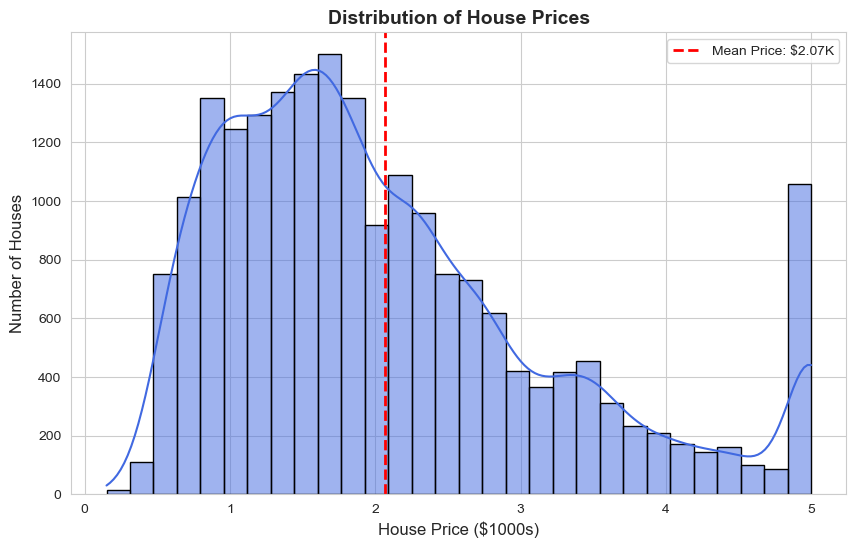

In [10]:
# Plot Price Distribution 
sns.set_style ('whitegrid') 

#Create histogram 
plt.figure(figsize=(10,6)) 
sns.histplot(df['Price'], bins=30, kde=True, color='royalblue', edgecolor='black')

#Add labels 
plt.title("Distribution of House Prices", fontsize=14, fontweight='bold') 
plt.xlabel("House Price ($1000s)", fontsize=12)
plt.ylabel("Number of Houses", fontsize=12) 

#Mean Price vs. Vertical Line 
mean_price= df["Price"].mean()
plt.axvline(mean_price, color='red', linestyle='dashed',linewidth=2, label=f"Mean Price: ${mean_price:.2f}K")

#Add legend 
plt.legend()
plt.show()

In [11]:
#Correlation Analysis to determine high interest features 
correlation =df.corr()["Price"].sort_values(ascending=False) 
print(correlation) 

Price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price, dtype: float64


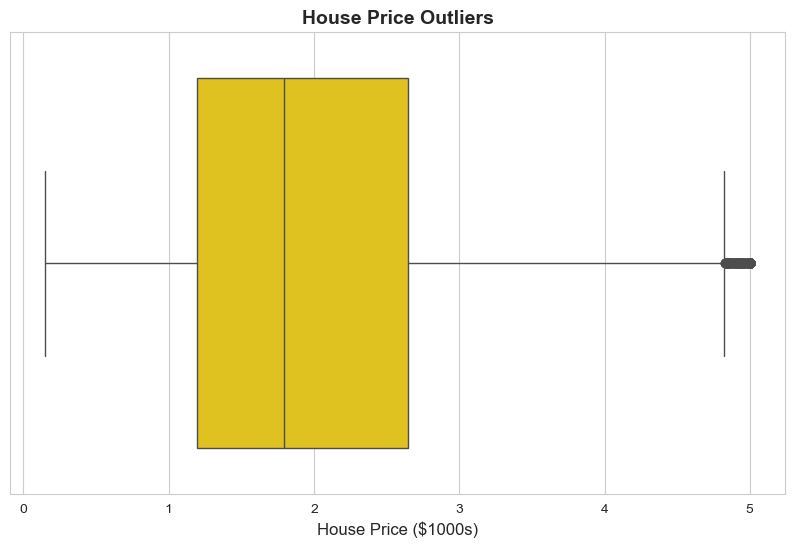

In [12]:
#Detecting Outliers in Housing Prices 
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Price"], color="gold")

#Improve Labels 
plt.title("House Price Outliers", fontsize=14, fontweight='bold')
plt.xlabel("House Price ($1000s)", fontsize=12)

plt.show()

C:\Users\Cori\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


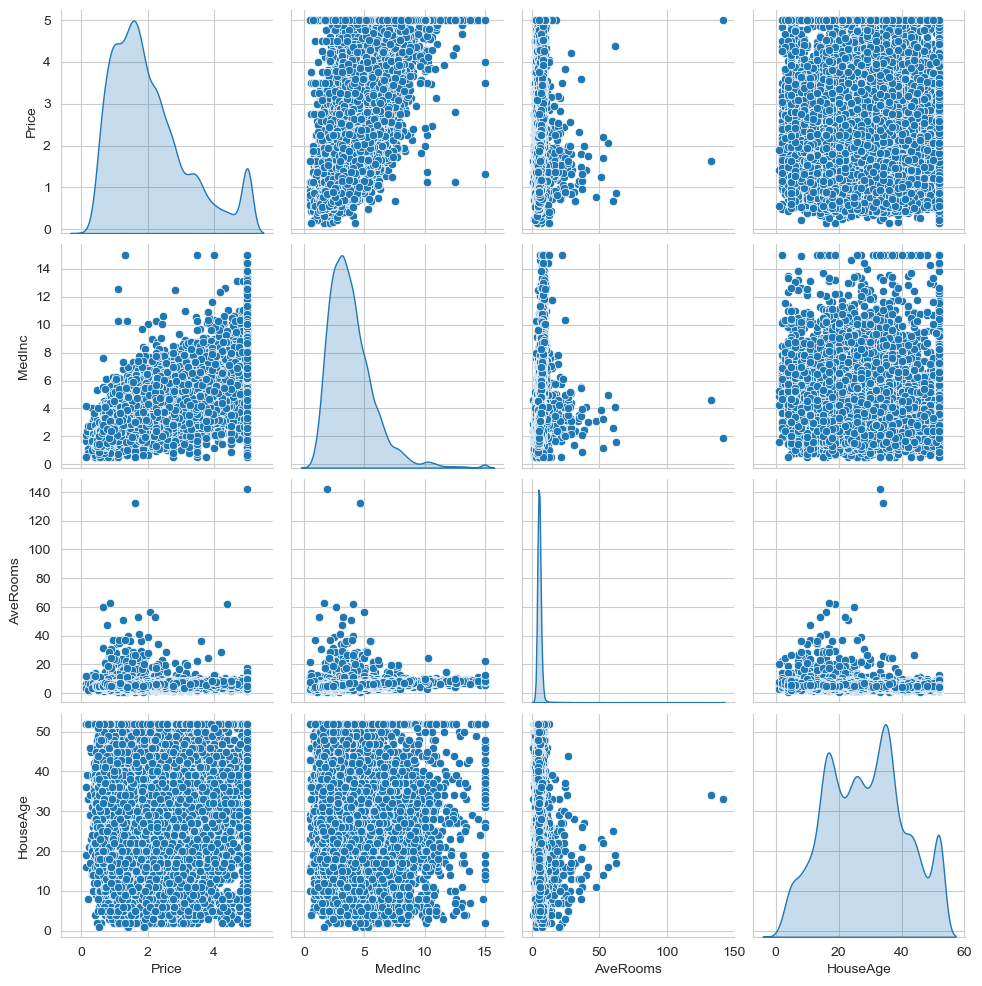

In [13]:
#Pair Plot for Feature Relationships
important_features = ["Price", "MedInc", "AveRooms", "HouseAge"]
sns.pairplot(df[important_features], diag_kind="kde")
plt.show()

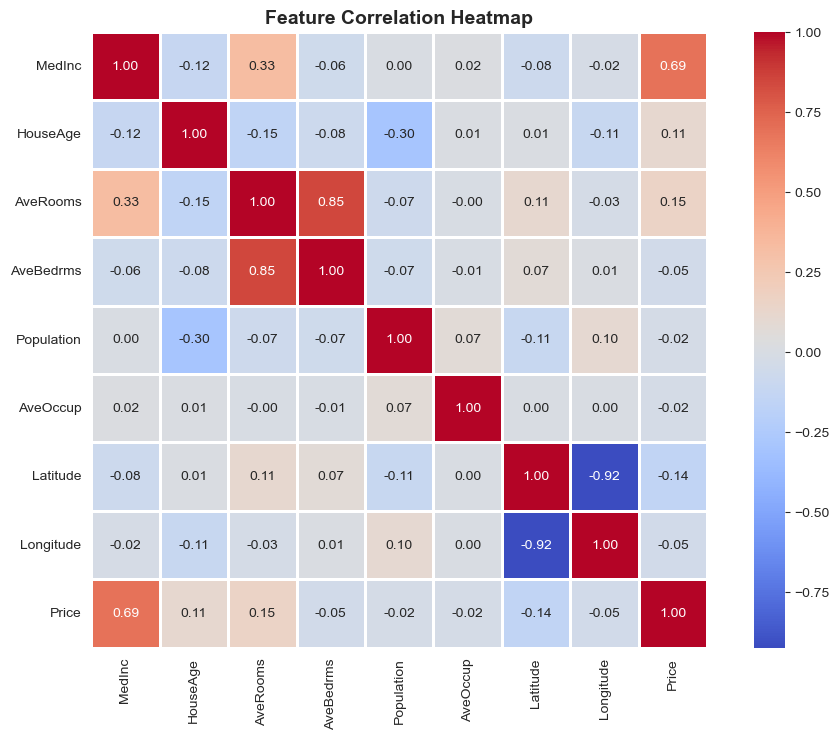

In [14]:
#Correlation Heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, square=True)

# Improve labels
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold")

plt.show()